In [ ]:
debug = True

In [227]:
from PIL import Image
import numpy as np

In [237]:
from pprint import pprint
from ipywidgets import widgets
from ipywidgets.widgets import interact
from IPython.display import display

In [67]:
import matplotlib.image as mpimg

In [68]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [79]:
%matplotlib notebook

### Allow user to select working data folder / data set

In [ ]:
%gui qt

In [ ]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name."""
    if dir is None: dir ='./'
    fname = QtGui.QFileDialog.getOpenFileNames(None, "Select file...", 
                                            dir, 
                                            filter = "TIF (*.tif);; All files (*)")
    return fname

In [ ]:
# Default folder
default_dir = '/Volumes/Macintosh HD 2/IPTS/TOF_Si_powder'

In [ ]:
%gui qt
list_fname = gui_fname(dir = default_dir)

Make sure files are sorted the right way !

In [ ]:
if debug:
    pprint(list_fname)
    print()
    pprint("Loaded %d files" %(len(list_fname)))

Load images

In [234]:
nbr_images = len(list_fname)
images = []

w = widgets.IntProgress()
w.max = nbr_images
display(w)

for _index in range(nbr_images):
        
        _file = list_fname[_index]
#        _image = mpimg.imread(_file)
        _image = Image.open(_file)
        _image = np.asarray(_image)
        images.append(_image)

        w.value = _index
    

## OB is part of the image

        b. calculate average counts
        c. divide each pixel of sample by OB avereage value

### a. Select region of the image that is OB and sample

<IPython.core.display.Javascript object>


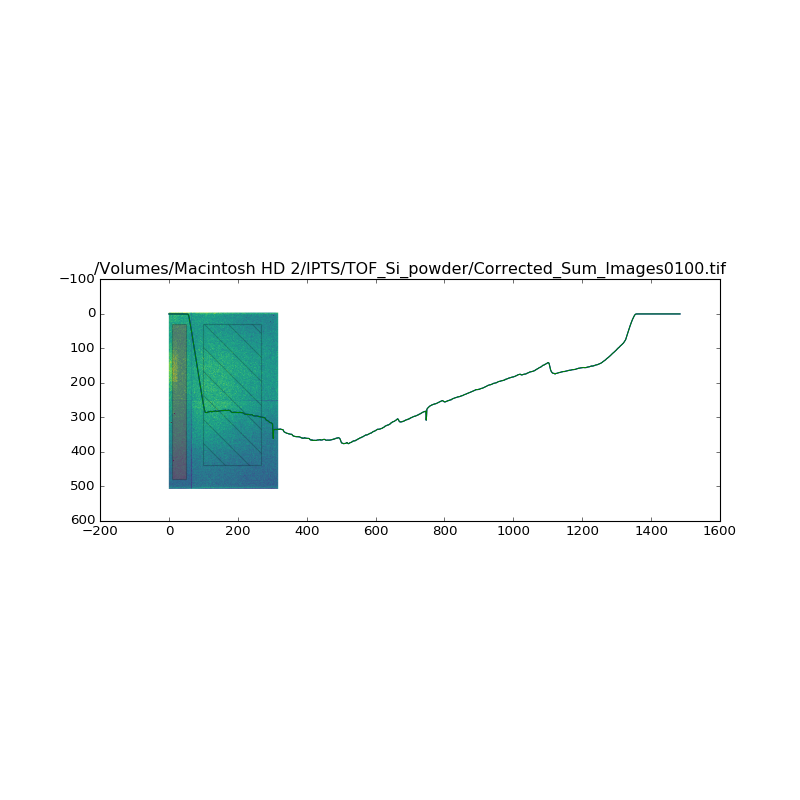

440


[[10, 50, 30, 478], [100, 267, 30, 440]]

In [271]:
[height, width] = images[0].shape
    
# select Sample region
def plot_images_to_select_ob_sample_regions(file_index, 
                                        ob_left, ob_right, ob_top, ob_bottom,
                                        s_left, s_right, s_top, s_bottom):

    _data = images[file_index]

    fig = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(_data, cmap='viridis')
    ax_img.set_title(list_fname[file_index])

    ax_img.add_patch(Rectangle((ob_left, ob_bottom), (ob_right-ob_left), (ob_top-ob_bottom), 
                               fill=True, 
#                               hatch='\\',,
                               alpha=0.2,
                              facecolor='red'))

    ax_img.add_patch(Rectangle((s_left, s_bottom), (s_right - s_left), (s_top - s_bottom), 
                              fill = False,
                               hatch = '\\',
                              alpha = 0.2,
                              facecolor = 'blue'))

    return [[ob_left, ob_right, ob_top, ob_bottom], [s_left, s_right, s_top, s_bottom]]


crop = interact(plot_images_to_select_ob_sample_regions,
               file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=100, description='Image Index'),

            ob_left = widgets.IntSlider(min=0, max=width, step=1, value=10, description='left OB'),
           ob_right = widgets.IntSlider(min=0, max=width, step=1, value=50, description='right OB'),
           ob_top = widgets.IntSlider(min=0, max=height, step=1, value=30, description='top OB'),
           ob_bottom = widgets.IntSlider(min=0, max=height, step=1, value=height-30, description='bottom OB'),

            s_left = widgets.IntSlider(min=0, max=width, step=1, value=100, description='left sample'),
           s_right = widgets.IntSlider(min=0, max=width, step=1, value=width-50, description='right sample'),
           s_top = widgets.IntSlider(min=0, max=height, step=1, value=30, description='top sample'),
           s_bottom = widgets.IntSlider(min=0, max=height, step=1, value=height-30, description='bottom sample')) 

# calculate average OB counts

# divide Sample region (each pixel) by average OB counts



In [272]:
[ob_selection, s_selection] = crop.widget.result
print("Region selected:")
print()
print("-> Open Beam: ")
print("      left: %d" %ob_selection[0])
print("     right: %d" %ob_selection[1])
print("       top: %d" %ob_selection[2])
print("    bottom: %d" %ob_selection[3])
print()
print("-> Sample: ")
print("      left: %d" %s_selection[0])
print("     right: %d" %s_selection[1])
print("       top: %d" %s_selection[2])
print("    bottom: %d" %s_selection[3])


Region selected:

-> Open Beam: 
      left: 10
     right: 50
       top: 30
    bottom: 478

-> Sample: 
      left: 100
     right: 267
       top: 30
    bottom: 440


### b. Calculate average counts in OB region (for each image) 

In [273]:
[ob_left, ob_right, ob_top, ob_bottom] = ob_selection

In [275]:
ob_average_counts = []
for _index in range(nbr_images):
    
    _data = images[_index]
    
    #region selected
    _ob = _data[ob_top: ob_bottom, ob_left: ob_right]
    _mean_value = np.mean(_ob)
    
    ob_average_counts.append(_mean_value)

<IPython.core.display.Javascript object>


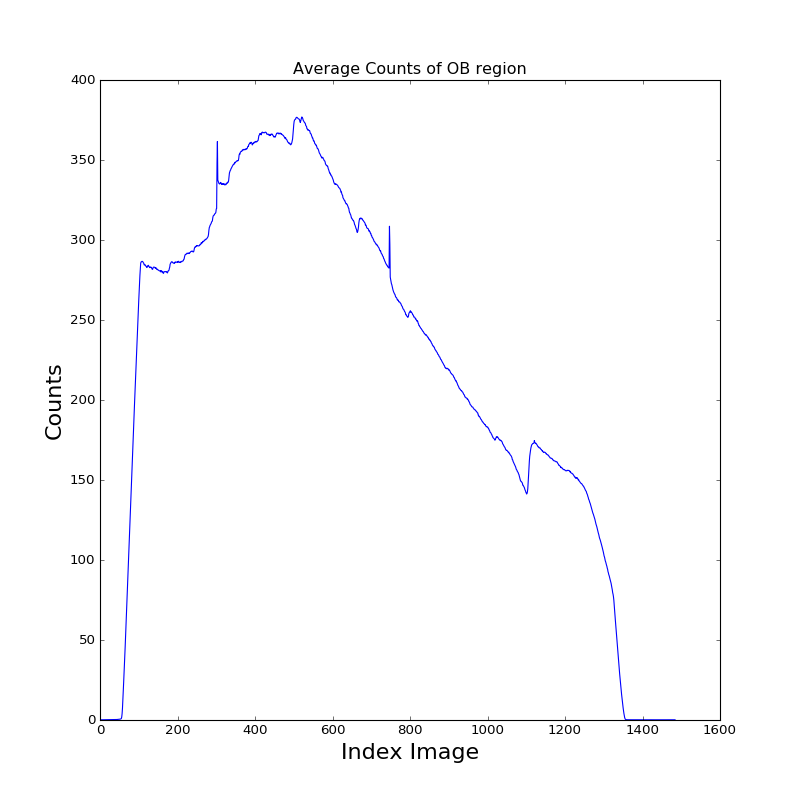

In [291]:
# display to check values
fig = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(nbr_images), ob_average_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Average Counts of OB region")



### c. Crop images to keep only sample region

### d. divide sample by OB average value

## OB are in their own files 

NOT IMPLEMENTED YET !!

In [57]:
def normalize_images_with_ob_own_files():
    raise NotImplementedError("TBD")

### Normalize images
Using average number of counts from OB ROI / images and divide each pixel of images by normalized coefficient

### Crop images by using only Sample region

### Select TOF file and define parameters required to calculate lambda equivalent spectra

### Offer various plots of Counts vs Lambda
     1. for each pixel
     2. for binning of pixels defined
     3. for entire images

### Display using new Ducu's method   (TO BE DEFINED)

### Calculate  for the material, the set of 'hkl' and display them on each Counts vs lambda plots

### Calculate the dominant 'hkl'
     1. for each pixel
     2. for bin of pixels